**Introduction**

Our primary goal is to develop a predictive model that will significantly enhance the efficiency and accuracy of the loan eligibility process for companies that specialize in providing home loans. Essentially, the model will be capable of identifying which customer segments qualify for loan amounts based on the information they provide on the online application form. This approach will identify eligible customers quickly and with minimal effort, thus streamlining the entire loan approval process. Ultimately, our project seeks to revolutionize the way finance companies approach loan eligibility, making it faster, easier, and more efficient for both lenders and borrowers.

**Data Source**: https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set
This set is composed of 614 rows with 13 columns.


**Data Selection**:
To conduct our predictive analysis, we will be using the loan approval dataset that has customer information gathered from their online application. This dataset has important attributes such as Gender, Marital Status, Education, Income, Loan Amount, Credit History, and other relevant details. We will use this dataset as the basis for our predictive modeling. As we recognize that this data set is rather limited by its size, we have also obtained an additional loan approval dataset which is of considerable length and includes additional attributes such as pre-approval status, upfront charges, and whether or not the loan was lump sum or not.

**Model Selection**:
Our goal is to automate the loan eligibility process by exploring and comparing various machine learning models for binary classification. The models we will be considering are:

**Logistic Regression** is a straightforward and easily understandable model that can offer valuable information about the correlation between loan eligibility and various features.

**Random Forest model** is a strong ensemble method that can effectively manage intricate connections and interactions between features.

**Evaluation of Results**:
In order to assess how well the models are performing, we will be utilizing the following metrics:
Accuracy: the purpose of assessing accuracy is to evaluate the overall performance of the model.
Precision: measuring the model's ability to identify loan eligibility correctly.
Recall: evaluate the model's ability to correctly identify positive instances. It is also referred to as the true positive rate (TPR) or sensitivity.
F1 Score: assesses the model's accuracy and takes both precision and recall into account.

In order to train the models and evaluate their performance, we will divide the dataset into separate training and testing sets. Additionally, we will use methods like cross-validation to assess how well the model can generalize to new data.

**Expected Learning**:
Our goal is to thoroughly examine the main factors that impact the approval of home loan applications. Our ultimate objective is to create a predictive model that automates the loan suitability evaluation process. This will allow organizations to identify suitable candidates and streamline their loan approval procedures to improve efficiency.

**Risks and Ethical Concerns**:
Privacy and Data: We prioritize privacy and data security by ensuring that personal information is protected and that we comply with privacy regulations throughout the handling and storage of data.

**Bias and fairness**: We will conduct a comprehensive analysis of the dataset to identify any potential biases and implement appropriate measures to mitigate them. Furthermore, we will assess the model's accuracy and fairness in predicting outcomes for diverse demographic groups, ensuring that no individual or group is unfairly discriminated against.

**Transparency**: To maintain transparency in our decision-making process, we will give priority to utilizing models that are simpler to comprehend. This will enable us to provide clear explanations of our decision-making process to all stakeholders involved.

*What visualizations are especially useful for explaining the data?*

The following are some examples of visualizations that may be especially helpful in presenting the data:  

In [1]:
# Load packages to read csv of loan approval data sets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # For early visualizations and EDA.
import seaborn as sns


In [2]:
# Read data from granjithkumar's dataset on kaggle
url = 'https://raw.githubusercontent.com/vuongmd/loan-approval/main/Loan_Train.csv'
granjithkumar_loan_aproval = pd.read_csv(url, sep=',')

In [3]:
# Display dimensions of dataset
granjithkumar_loan_aproval.shape

(614, 13)

In [4]:
# Display first 5 lines
granjithkumar_loan_aproval.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Display data types for columns in dataframe
granjithkumar_loan_aproval.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Interestingly, the column labeled `Credit_History` is listed as float64, which means that when we calculate summary statistics, we see mean, min, max, and the IQR. However, it appears that these numbers are actually represent a binary variable. We can operate under the presumption that this value likely means 0 is no prior credit history and 1 means that the applicant did have a prior credit history.

In [6]:
# Display summary statistics for categorical features
granjithkumar_loan_aproval.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
# Display summary statistics for numerical features
granjithkumar_loan_aproval.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Bar charts**: These are able to assist us in visualizing the distribution of categorical variables such as loan status, gender, marital status, education level, the size of one's property, and so on. It enables us to comprehend the ratios as well as the disparities that exist in the data.

Plot 1 : ***Distribution of Loan Status***

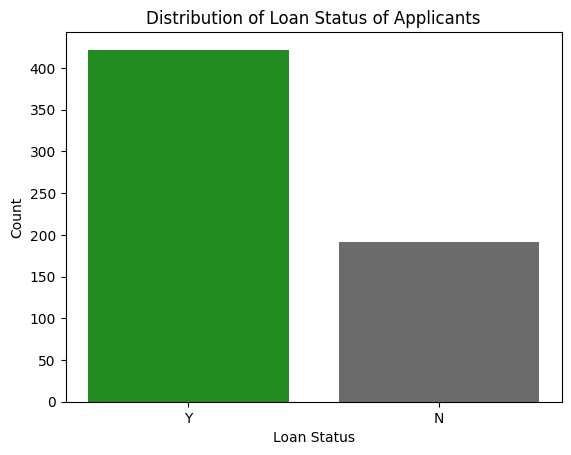

In [8]:
# Bar Chart - Loan Status
loan_status = granjithkumar_loan_aproval['Loan_Status'].value_counts()
plt.bar(loan_status.index, loan_status.values, color=['#228B22', '#6B6B6B'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status of Applicants')
plt.show()


Plot 2 : ***Distribution of Marital Status***

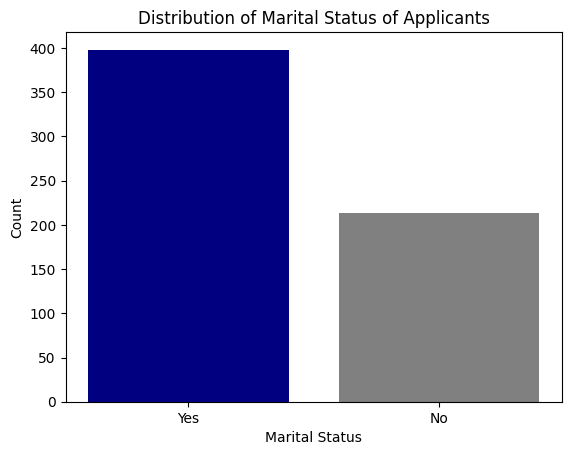

In [9]:
# Bar Chart - Marital Status

married_applicants = granjithkumar_loan_aproval['Married'].value_counts()
plt.bar(married_applicants.index, married_applicants.values,
        color=['#000080', '#808080'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status of Applicants')
plt.show()

Plot 3 : ***Distribution of Education Level***

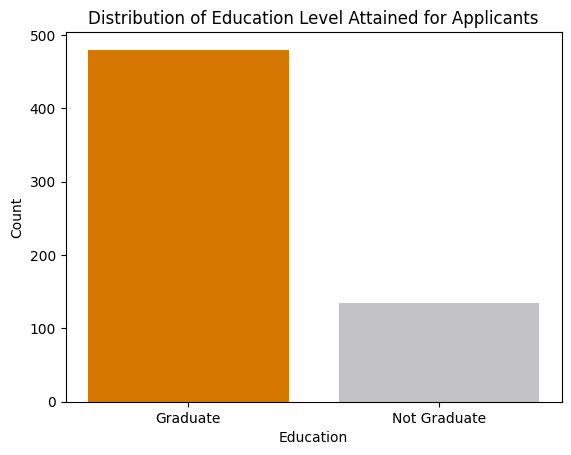

In [10]:
# Bar Chart - Education

applicant_education = granjithkumar_loan_aproval['Education'].value_counts()
plt.bar(applicant_education.index, applicant_education.values,
        color=['#d67800', '#c3c2c5'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Level Attained for Applicants')
plt.show()

Plot 4 : ***Distribution of Gender***

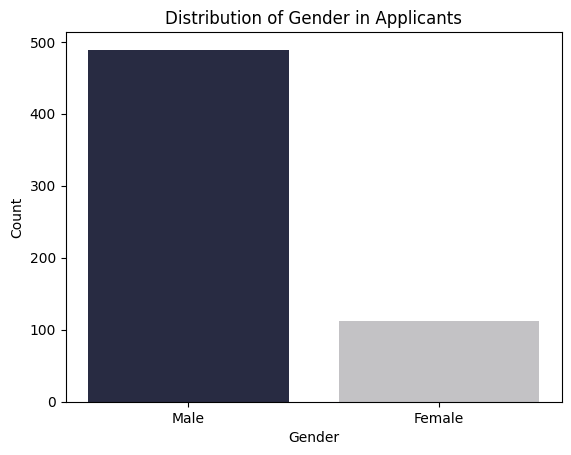

In [11]:
# Bar Chart - Gender

applicant_gender = granjithkumar_loan_aproval['Gender'].value_counts()
plt.bar(applicant_gender.index, applicant_gender.values,
        color=['#282b42', '#c3c2c5'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in Applicants')
plt.show()

**Histograms and density plots** are two types of graphs that can assist with conducting an analysis of the distribution of numerical variables such as applicant income, coapplicant income, loan amount, and so on. We can determine whether the data contains any outliers or skewness.

Plot 5 : ***Loan Amount Distribution***

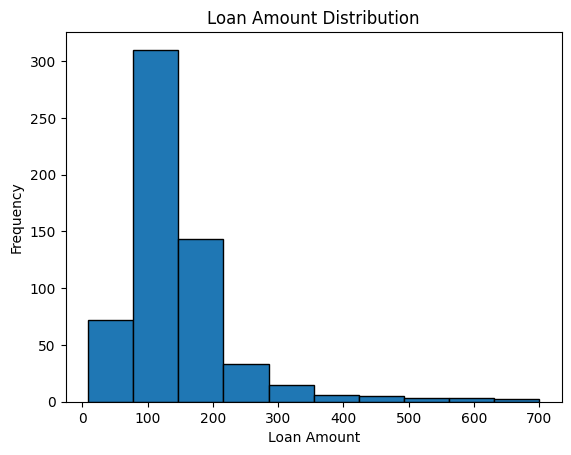

In [12]:
# Histogram
# Extract loan Amount Column
column_data = granjithkumar_loan_aproval['LoanAmount']

# Create the histogram
plt.hist(column_data, bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')

# Display the plot
plt.show()

Plot 6 : ***Log Loan Amount Distribution***

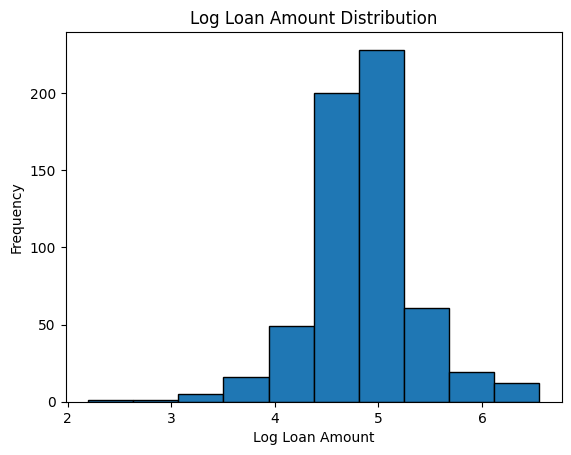

In [13]:
# Histogram
# Extract loan Amount Column
column_data = granjithkumar_loan_aproval['LoanAmount']

# Create the histogram
plt.hist(np.log(column_data), bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')
plt.title('Log Loan Amount Distribution')

# Display the plot
plt.show()

Plot 7 : ***Applicant Income Distribution***

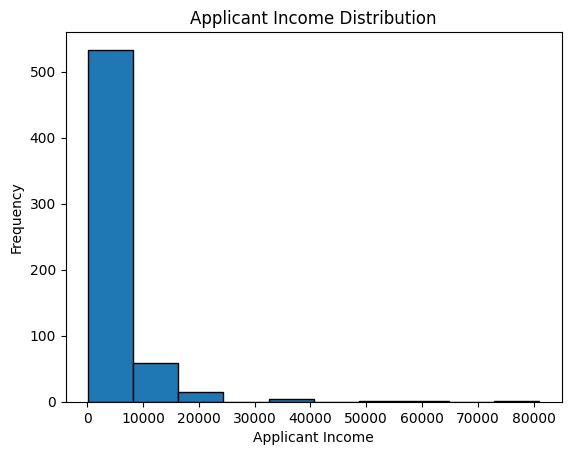

In [14]:
# Histogram
# Extract Applicant Income Column Data
column_data = granjithkumar_loan_aproval['ApplicantIncome']

# Create the histogram
plt.hist(column_data, bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')

# Display the plot
plt.show()

Plot 8 : ***Log Applicant Income Distribution***

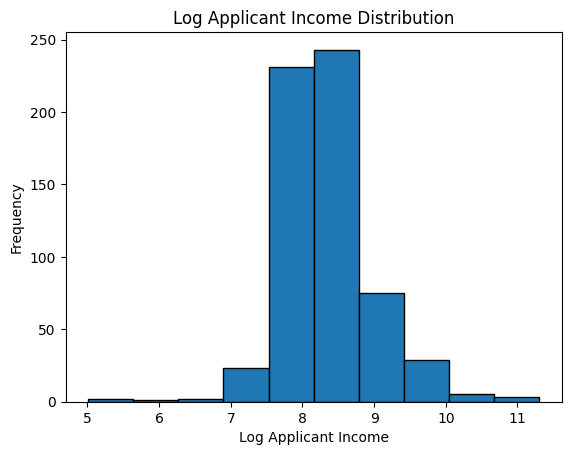

In [15]:
# Histogram
# Extract Applicant Income Column Data
column_data = granjithkumar_loan_aproval['ApplicantIncome']

# Create the histogram
plt.hist(np.log(column_data), bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Log Applicant Income')
plt.ylabel('Frequency')
plt.title('Log Applicant Income Distribution')

# Display the plot
plt.show()

**Box plots** are a valuable tool for analyzing the differences and similarities in the distribution of numerical data across a variety of categories. We are able to make comparisons between, for instance, the amount of the loan for certain degrees of education or property value.

Plot 9 : ***Loan Amount By Property Area***

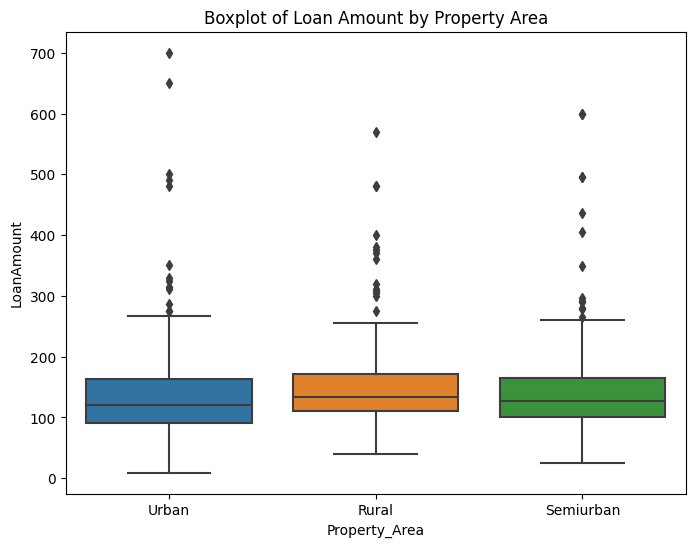

In [16]:
# Specify the numerical and categorical columns
numerical_column = 'LoanAmount'
categorical_column = 'Property_Area'

# Create the boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=categorical_column, y=numerical_column,
            data=granjithkumar_loan_aproval)

# Set labels and title
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.title('Boxplot of Loan Amount by Property Area')

# Display the plot
plt.show()


The **correlation matrix** or **heatmap** is a tool that may display the degree to which several numerical variables are related to one another. This gives us the ability to spot any significant associations or problems with multicollinearity.

Plot 10 : ***Correlation Matrix Heatmap***

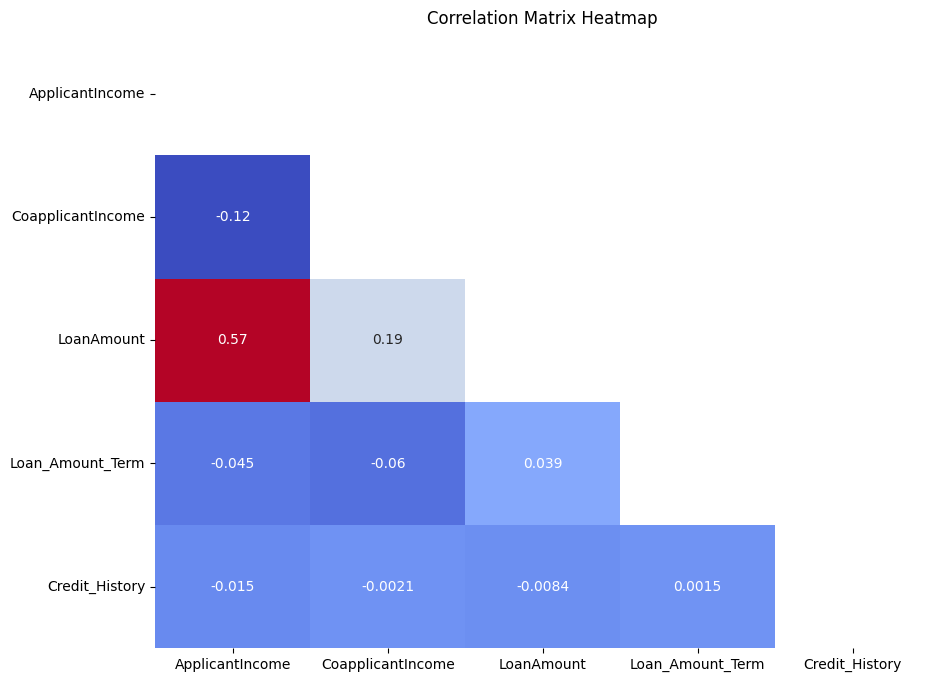

In [17]:
# Heatmap
# Create the correlation matrix
correlation_matrix = granjithkumar_loan_aproval.corr(numeric_only=True)

# Define mask object for heatmap
mask=np.triu(np.ones_like(correlation_matrix))

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            cbar=False)

# Set title
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

*Do I need to adjust my data and/or driving questions?*

The exploratory data analysis (EDA) led to the discovery of missing values and outliers in the dataset; therefore, it is necessary for us to adjust the data. As a result, we will be required to carry out the steps of data preprocessing, which include the handling of missing values, likely with imputation with median values, and the resolution of outliers.

Figure 1 : ***Missing Data***

In [18]:
# Verify if there is any missing data
granjithkumar_loan_aproval.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Plot 11 : ***Outliers***

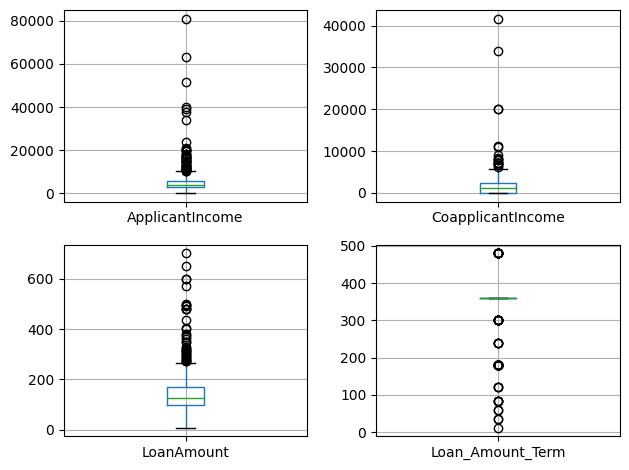

In [19]:
# Boxplots to show outliers
fig, axes = plt.subplots(2,2)

outlierslist = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term']
for i,el in enumerate(outlierslist):
    a = granjithkumar_loan_aproval.boxplot(el, ax=axes.flatten()[i])
plt.tight_layout()
plt.show()

*Do I need to adjust my model/evaluation choices?*

We would not alter the driving research question as we have chosen to investigate and evaluate various machine learning models for binary classification to achieve our objective. We will consider logistic regression, random forest, and gradient boosting as models. As they can manage both categorical and numeric features, these models are well-suited for loan eligibility prediction tasks.

*Are my original expectations still reasonable?*

Yes, our project expectations are reasonable. We want to simplify home loan eligibility with a prediction model. Gender, marital status, education, income, loan amount, and credit history predict loan eligibility are attributes in the dataset. We trust these features since they match loan approval factors.

Logistic regression, random forest, and gradient boosting are prominent binary classification methods for category and numerical features. This should predict loan eligibility. Accuracy, precision, ROC-AUC, F1 score, sensitivity, and specificity evaluate these models. These metrics will reveal our models' accuracy, discrimination, and prediction.

We prioritize privacy, data security, and fairness. We value privacy laws and data protection. We will address biases and assess our models' demographic fairness. Therefore, our initial expectations will help achieve the project goals. To assure accuracy, fairness, and efficiency, we must remain flexible and responsive.

**Data Collection**

Two datasets on loan approval were obtained from Kaggle as the primary data sources. Dataset 1 has 614 rows and 13 columns, whereas Dataset 2 has 148,670 rows and 37 columns. These datasets contain client data collected through online loan application forms.

**Data Preparation**

**Missing Values:** Techniques such as imputation were used to address missing values in the datasets.  

**Outliers:** Outliers were identified and effectively managed. Extreme values that deviated substantially from the normal range were either eliminated or transformed to reduce their influence on the predictive models.
Consistency of Data: Categorical variables were transformed with one-hot encoding to facilitate further analysis and modeling.

In [20]:
# Remove rows with missing values
data= granjithkumar_loan_aproval.dropna()

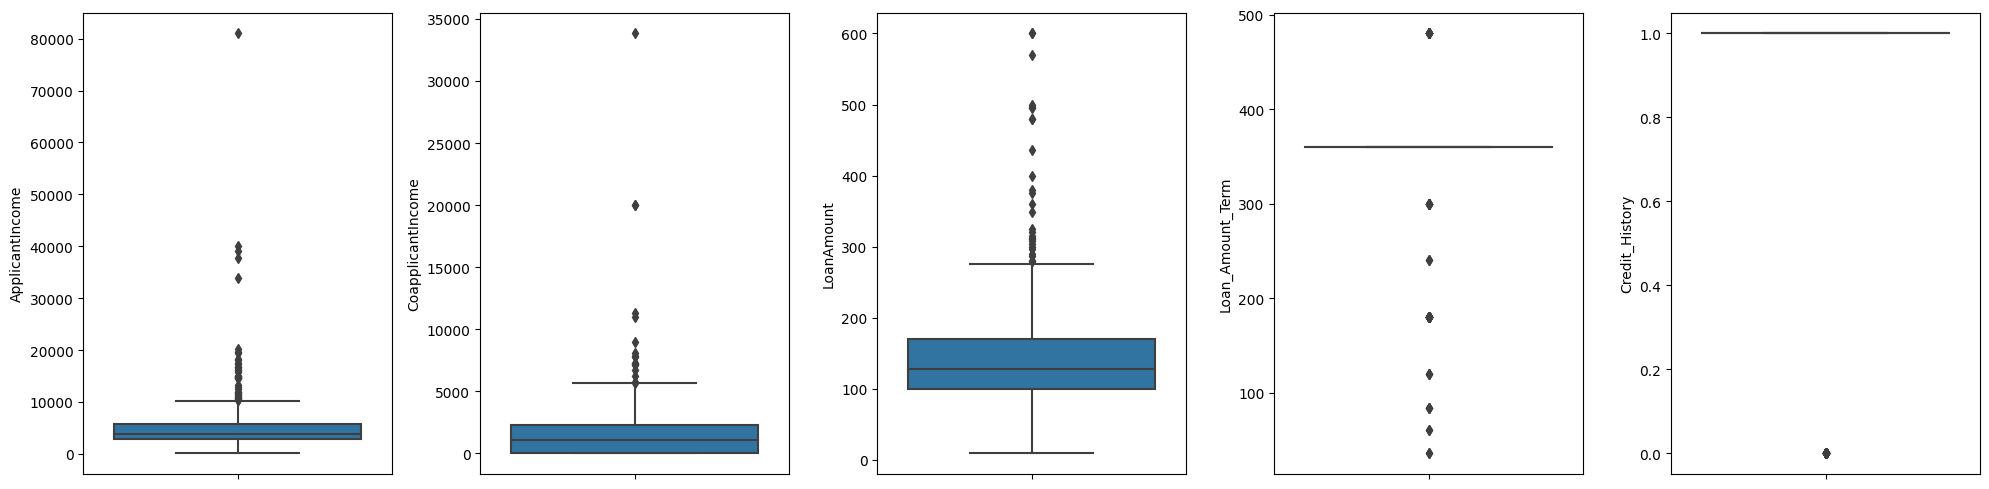

In [21]:
# Check for outliers

_, ax = plt.subplots(1, 5, figsize=(20,5))

for idx , col in enumerate(data.select_dtypes('number').columns):
    sns.boxplot(data=data, y=col, ax=ax[idx])
    plt.tight_layout()
plt.show()

In [22]:
from scipy import stats
# Select the variables to detect outliers
variables = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]

# Detect and remove outliers using z-score method
z_scores = np.abs(stats.zscore(data[variables]))
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from the dataset
data = data.drop(data.index[outlier_indices[0]])

# Print the number of outliers detected and removed
print("Number of outliers detected and removed:")
for i, variable in enumerate(variables):
    print(f"{variable}: {len(outlier_indices[0][outlier_indices[1] == i])}")

# Save the data without outliers to a new CSV file
data.to_csv("data_without_outliers.csv", index=False)

Number of outliers detected and removed:
ApplicantIncome: 5
CoapplicantIncome: 5
LoanAmount: 10
Loan_Amount_Term: 10
Credit_History: 0


**Feature Selection for Data Integration:**  
Relevant Features: Relevant loan eligibility prediction features were chosen based on their prospective impact on the target variable.  

Functional Engineering: the dataset was divided into training and testing sets in order to evaluate the performance of the models. Seventy to eighty percent of the data was allocated for training the models, while the remaining twenty to thirty percent was designated for evaluating the models' generalizability. The procedure of splitting ensured that the models were evaluated using unobserved data.


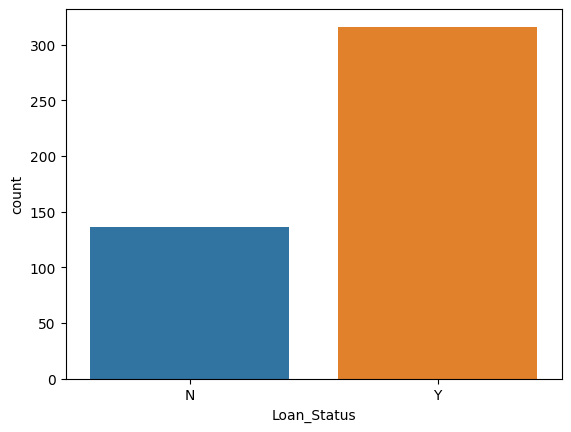

In [23]:
from collections import Counter
#split data to features and target
features = data.drop('Loan_Status', axis=1)
target = data['Loan_Status']

Counter(target)
sns.countplot(data=data, x="Loan_Status")
plt.show()

In [24]:
#Data resampling

from imblearn.over_sampling import RandomOverSampler

sam = RandomOverSampler(random_state=42)

features, target = sam.fit_resample(features, target)

Counter(target)

Counter({'N': 316, 'Y': 316})

In [25]:
#Text encoding
data_encoded = pd.get_dummies(features, drop_first=True)
data_encoded.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,...,Loan_ID_LP002990,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,1.0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
2,2583,2358.0,120.0,360.0,1.0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1


In [26]:
#Feature selection
from sklearn.feature_selection import SelectKBest

fe = SelectKBest(k=30).set_output(transform="pandas")
selected_features = fe.fit_transform(data_encoded, target)

selected_features.head()

,CoapplicantIncome,Credit_History,Loan_ID_LP001014,Loan_ID_LP001179,Loan_ID_LP001228,Loan_ID_LP001379,Loan_ID_LP001665,Loan_ID_LP001673,Loan_ID_LP001702,Loan_ID_LP001708,...,Loan_ID_LP002841,Loan_ID_LP002862,Loan_ID_LP002863,Loan_ID_LP002911,Loan_ID_LP002990,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1508.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2358.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4196.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


**Data Transformation**

Techniques for data transformation were used to ensure compatibility with the selected predictive models:  

Scaling Numerical Features: Numerical features were scaled or normalized to achieve a comparable scale. This was done to prevent larger ranged features from dominating the learning process of the model.  

Categorical features: were encoded using techniques such as one-hot encoding and ordinal encoding to represent them as numerical values that can be processed by the models.

**Data Balancing**

After evaluating the loan approval dataset for class imbalance, techniques such as oversampling the minority class or under sampling the majority class were implemented to balance the dataset. This assisted in addressing potential bias in the model's predictions and enhanced performance overall.


In [27]:
#Transform Target
from sklearn.preprocessing import LabelEncoder

target =  LabelEncoder()\
          .fit_transform(target)

In [28]:
from sklearn.model_selection import train_test_split

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(data_encoded, target,
                                                    test_size=0.2, shuffle=True,
                                                    random_state=42, stratify=target)

In [29]:
#Scaling the data

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Model Building**

*Logistic regression - Before Parameter Tuning*

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
preds = lr.predict(x_test_scaled)

acc_score = accuracy_score(y_test, preds)
prec_score = precision_score(y_test, preds)
rec_score = recall_score(y_test, preds)
F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {acc_score}")
print(f"The precision score of the model is {prec_score}")
print(f"The recall score of the model is {rec_score}")
print(f"The f1 score score of the model is {F1_score}")


print("-"*150)
print("-"*150)


print(classification_report(y_test, preds))

The accuracy score of the model is 0.8031496062992126
The precision score of the model is 0.7794117647058824
The recall score of the model is 0.8412698412698413
The f1 score score of the model is 0.8091603053435115
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        64
           1       0.78      0.84      0.81        63

    accuracy                           0.80       127
   macro avg       0.80      0.80      0.80       127
weighted avg       0.81      0.80      0.80       127



*Logistic Regression - After Parameter Tuning*

In [32]:
#Logistics regression parameter tuning

from sklearn.model_selection import GridSearchCV

params = {

    'C':[1,5, 10, 20],
    'penalty':['l1', 'l2']
}

lr_grid = GridSearchCV(lr, params, n_jobs=-1)
lr_grid.fit(x_train_scaled, y_train)

print(lr_grid.best_params_)
print(lr_grid.best_score_)

{'C': 5, 'penalty': 'l1'}
0.9069306930693071


In [33]:
def grid_search_tuning_results(model):
    girdpreds = model.best_estimator_.predict(x_test_scaled)
    cm = confusion_matrix(y_test, girdpreds)

    print("accuracy:",accuracy_score(y_test, girdpreds))
    print("precision:",precision_score(y_test, girdpreds))
    print("recall:",recall_score(y_test, girdpreds))
    print("F1 score:",f1_score(y_test, girdpreds))
    print("specifity", ((cm[1,1])/(cm[1,1]+cm[0,1])))

grid_search_tuning_results(lr_grid)

accuracy: 0.984251968503937
precision: 0.9841269841269841
recall: 0.9841269841269841
F1 score: 0.9841269841269841
specifity 0.9841269841269841


*Random Forest Model - Before Parameter Tuning*

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [35]:
preds = rf.predict(x_test_scaled)

rf_acc_score = accuracy_score(y_test, preds)
rf_prec_score = precision_score(y_test, preds)
rf_rec_score = recall_score(y_test, preds)
rf_F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {rf_acc_score}")
print(f"The precision score of the model is {rf_prec_score}")
print(f"The recall score of the model is {rf_rec_score}")
print(f"The f1 score score of the model is {rf_F1_score}")


print("-"*150)
print("-"*150)

The accuracy score of the model is 0.937007874015748
The precision score of the model is 1.0
The recall score of the model is 0.873015873015873
The f1 score score of the model is 0.9322033898305084
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


*Random Forest Model - After Parameter Tuning*

In [36]:
params = {
    'max_depth':[2,3,4,10,20],
    'n_estimators':[50, 100, 120]
}


rf_grid = GridSearchCV(rf, params, cv=2, n_jobs=-1)
rf_grid.fit(x_train_scaled, y_train)

print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 20, 'n_estimators': 100}
0.7921607378129117


In [37]:
grid_search_tuning_results(rf_grid)

accuracy: 0.905511811023622
precision: 0.8805970149253731
recall: 0.9365079365079365
F1 score: 0.9076923076923077
specifity 0.8805970149253731


**Model Comparison**

Pre-Tuning Summary

In [38]:
models = pd.DataFrame({

    'Model':["Logistic Regression", "Random Forest"],
    'Accuracy':[acc_score, rf_acc_score],
    'Precision':[prec_score, rf_prec_score],
    'Recall':[rec_score, rf_rec_score],
    'F1 score':[F1_score, rf_F1_score]
}).round(2)

models['Accuracy'] = models['Accuracy'] * 100
models['Precision'] = models['Precision'] * 100
models['Recall'] = models['Recall'] * 100
models['F1 score'] = models['F1 score'] * 100

models.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 score
1,Random Forest,94.0,100.0,87.0,93.0
0,Logistic Regression,80.0,78.0,84.0,81.0


Post-Tuning Summary

In [39]:
data = [['Logistic Regression', 98.0, 98.0, 98.0, 98.0],['Random Forest', 91.0, 88.0, 94.0, 91.1]]
tunedmodels = pd.DataFrame(data, columns=['Model','Accuracy','Precision','Recall','F1 Score'])
tunedmodels.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,98.0,98.0,98.0,98.0
1,Random Forest,91.0,88.0,94.0,91.1


In terms of accuracy, precision, recall, and F1 score, the Logistic Regression model outperforms the Random Forest model when comparing the metrics. It obtains greater values for each of these metrics, indicating superior performance overall. The Logistic Regression model appears to be the best option for predicting loan status based on the available data.

**Results**

**Logistic Regression**

Accuracy: With a 0.9842 accuracy, the model predicts loan status well. The model predicts 98.42% of the dataset's loan statuses. Accuracy indicates the percentage of correct predictions.

Precision: 0.9841 shows the model's ability to correctly identify loan approvals among expected positive events. It means the model predicts 98.41% of loans are accepted. Precision reduces false positives, ensuring loan approval predictions are accurate.

Recall: The model can accurately identify loan approvals with a recall value of 0.9841. The model predicts 98.41% of loan approvals. High recall prevents eligible loans from being misclassified as ineligible.

F1 Score: The 0.9841 F1 score combines precision and recall. It considers the model's ability to identify loan approvals and avoid false positives and rejections.


**Random Forest**

Accuracy: The Random Forest model predicted loan status with 90.55% accuracy. The model matches 90.55% of the dataset's loan statuses.

Precision: The Random Forest model properly predicts 88.06% of loan approvals with a precision of 0.8806. The model forecasts loan approval 88.06% of the time. High precision means the model predicts loan approvals accurately.

Recall: The Random Forest model successfully identifies 93.65% of loan approvals with a recall value of 0.9365. The model properly identifies 93.65% of loan approvals. High recall reflects the model's ability to capture loan approvals and minimize false negatives.
F1 Score: The 0.9077 F1 score combines precision and recall. It balances the model's ability to recognize loan approvals and avoid false positives and rejections. Higher F1 scores indicate better performance.


**Feature Importance**

In [40]:
! pip install scikit-plot -q

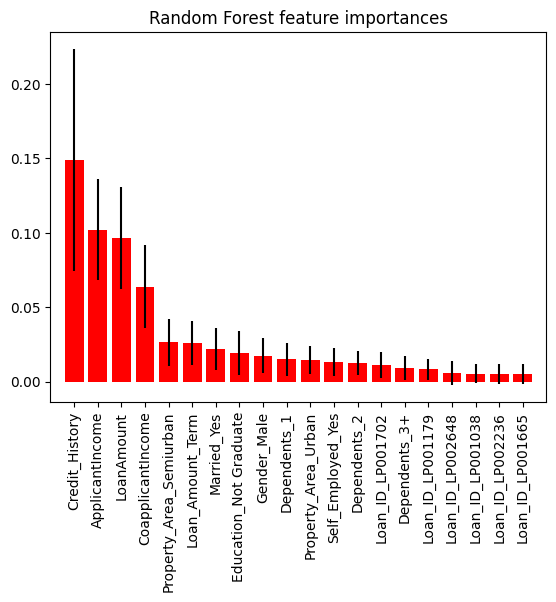

In [41]:
#Feature importance
import scikitplot as skplt

skplt.estimators.plot_feature_importances(rf, feature_names=x_train_scaled.columns.to_list(), title="Random Forest feature importances")
plt.xticks(rotation=90)
plt.show()

Credit history, applicant income, loan amount and co applicant income were the most important features in predicting loan status.